<a href="https://colab.research.google.com/github/Gabrieldiasdeoliveira/People-Analytics---Turnover/blob/main/People_Analytics_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de People Analytics

``
O objetivo deste projeto é realizar uma análise do turnover dos colaboradores da Empresa X e compreender quais áreas de atuação que podem ser exploradas para mitigar o impacto dessa variável na empresa. Inicialmente, nosso foco será uma abordagem descritiva, buscando entender os padrões e tendências de rotatividade dentro da organização. Ao longo do projeto, planejamos propor análises prescritivas, oferecendo recomendações acionáveis ​​para reduzir o impacto do faturamento. Embora não estejamos realizando uma análise financeira direta neste estágio, nossa meta é fornecer insights valiosos que podem ser aplicados estrategicamente para melhorar a retenção de talentos e a estabilidade organizacional.
``



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from google.colab import files


In [2]:
# Carregando o arquivo Excel em um DataFrame do pandas
caminho_arquivo = '/Base de colaboradores 2.xlsx'
dados = pd.read_excel('/Base de colaboradores 2.xlsx')

In [3]:
dados.head()

,Data Admissão,Tempo de Empresa,Sexo,Sexo_num,Escolaridade,Escolaridade_num,Estado Civil,Estado_Civil_num,Deficiente,Deficiente_num,Data de Nasc,IDADE,Atingimento BSC,Quantidade de Faltas,Quantidade de Atrasos,Quantidade de Atestados,Dias,Situacao,Data Desl/Cessão
0,2016-09-12,6.309589,Feminino,0,Ensino Médio Completo,0.0,Solteiro,1,Não,1,1996-12-02,27.380822,0.41,2,1,7,2303,0,2023-01-02
1,2017-09-11,5.312329,Feminino,0,Ensino Médio Completo,0.0,Solteiro,1,Sim,0,1997-11-24,26.402740,0.05,3,6,0,1939,0,2023-01-02
2,2017-12-04,5.115068,Feminino,0,Ensino Médio Completo,0.0,Solteiro,1,Não,1,1999-05-25,24.904110,0.38,3,7,2,1867,0,2023-01-14
3,2022-11-11,0.142466,Feminino,0,Ensino Médio Completo,0.0,Casado,5,Não,1,1986-08-13,37.693151,0.74,2,1,3,52,0,2023-01-02
4,2020-08-03,2.454795,Feminino,0,Ensino Médio Completo,0.0,Solteiro,1,Não,1,1991-01-07,33.287671,0.01,0,1,2,896,0,2023-01-16


In [17]:
# Filtrando os dados removendo as categorias específicas da Escolaridade
dados_filtrados = dados[~dados['Escolaridade'].isin(['Ensino Médio Incompleto', 'Ensino Fundamental Completo'])]



In [66]:
import warnings
warnings.filterwarnings("ignore", message="Passing `palette` without assigning `hue` is deprecated")


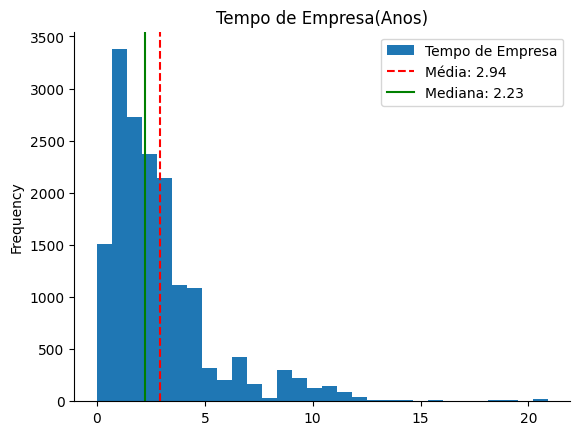

In [58]:
# Calculando a média e mediana
media = dados['Tempo de Empresa'].mean()
mediana = dados['Tempo de Empresa'].median()

# Plotando o histograma com a média e a mediana
dados['Tempo de Empresa'].plot(kind='hist', bins=30, title='Tempo de Empresa(Anos)')
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', label=f'Mediana: {mediana:.2f}')
plt.legend()

# Removendo as bordas superior e direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


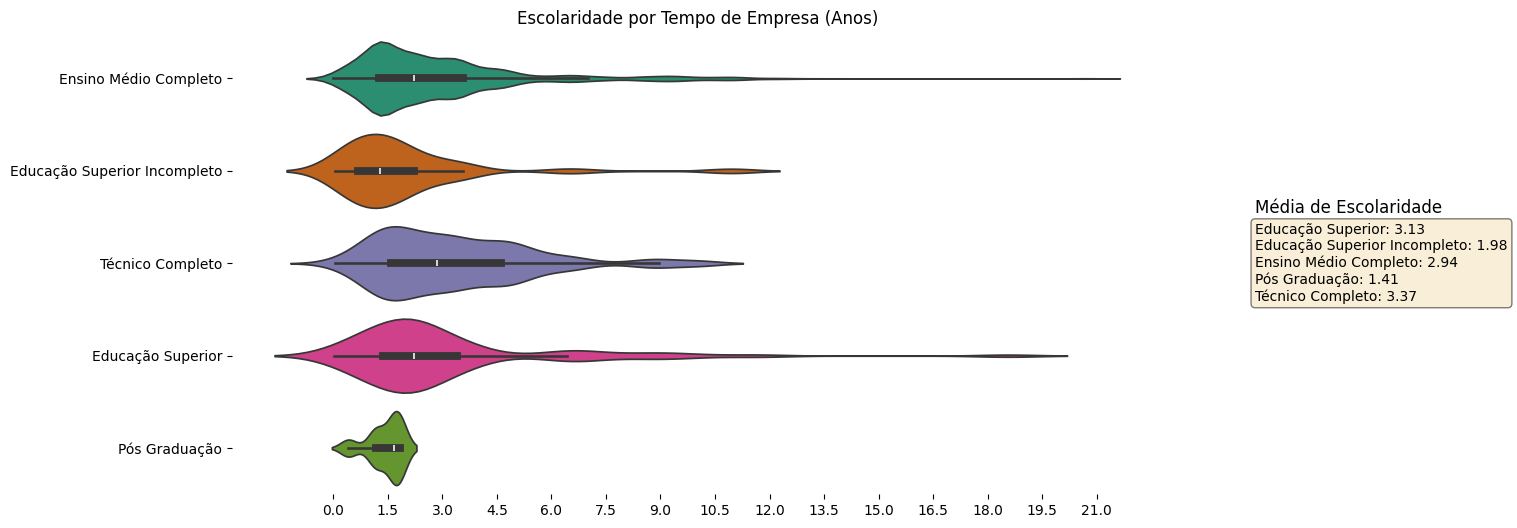

In [74]:
# @title Grafico de Tempo de Empresa por Escolaridade

# Calculando as médias para cada categoria de escolaridade
medias_por_escolaridade = dados_filtrados.groupby('Escolaridade')['Tempo de Empresa'].mean()

# Plotando um gráfico com as modificações e adicionando um título
fig, ax = plt.subplots(figsize=figsize)
sns.violinplot(data=dados_filtrados, x='Tempo de Empresa', y='Escolaridade', hue='Escolaridade', inner='box', palette='Dark2', ax=ax, legend=False)
plt.title('Escolaridade por Tempo de Empresa (Anos)')

# Adicionando a caixa de texto com as médias ao lado do gráfico
textstr = '\n'.join(f'{escolaridade}: {media:.2f}' for escolaridade, media in medias_por_escolaridade.items())
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.1, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center', bbox=props)

# Adicionando um título à caixa de texto das médias
ax.text(1.1, 0.6, 'Média de Escolaridade', transform=ax.transAxes, fontsize=12, verticalalignment='bottom')

# Removendo o título do eixo y
ax.set_ylabel('')

# Removendo o título do eixo x
ax.set_xlabel('')

# Definindo os ticks do eixo x com incrementos de 1.5
plt.xticks(np.arange(0, dados_filtrados['Tempo de Empresa'].max() + 1.5, 1.5))

sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()


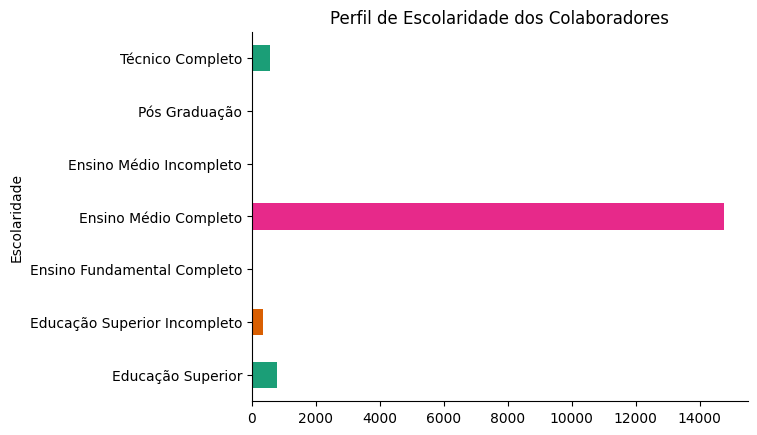

In [71]:
# @title Escolaridade

from matplotlib import pyplot as plt
import seaborn as sns
dados.groupby('Escolaridade').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Perfil de Escolaridade dos Colaboradores')
plt.gca().spines[['top', 'right',]].set_visible(False)

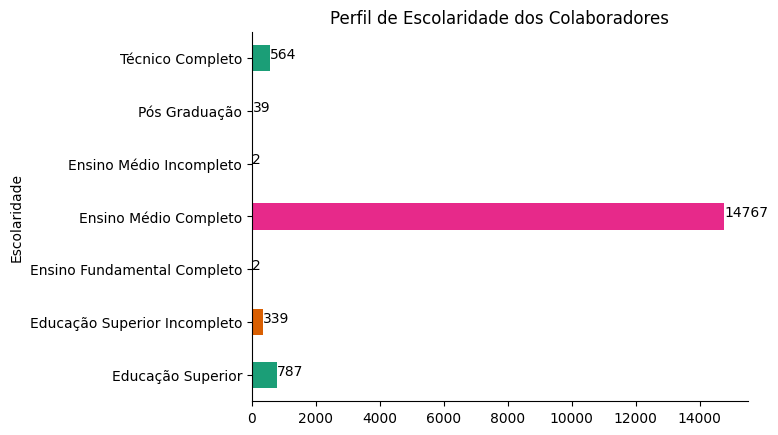

In [69]:
# Plotar o gráfico de barras
ax = dados.groupby('Escolaridade').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Adicionar texto com as quantidades ao lado de cada barra
for i, v in enumerate(dados.groupby('Escolaridade').size()):
    ax.text(v + 3, i, str(v), color='black')

# Configurar título do gráfico
plt.title('Perfil de Escolaridade dos Colaboradores')

# Remover as bordas superior e direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


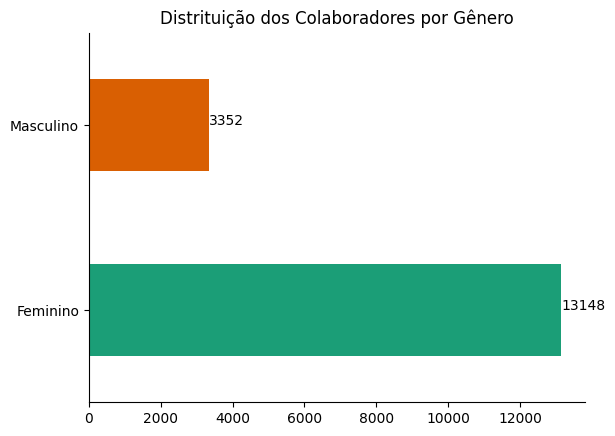

In [40]:
# Plotar o gráfico de barras
ax = dados.groupby('Sexo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Remover o título do eixo y
plt.gca().set_ylabel('')

# Adicionar texto com as quantidades ao lado de cada barra
for i, v in enumerate(dados.groupby('Sexo').size()):
    ax.text(v + 3, i, str(v), color='black')

# Remover as bordas superior e direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Configurar título do gráfico
plt.title('Distrituição dos Colaboradores por Gênero')

plt.show()

